# Salary Prediction Based on Job Description

# Part 1 - DEFINE

----- 1. define the problem -----

This project aims to predict salary based on job description, including job type, degree, major, industry, experience, distance to metropolis cities etc.

We will apply several different models and find the one that generates the least Mean Standard Error.


In [4]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 2 - DISCOVERY
---- 2. load the data ----

In [ ]:
import sys
sys.path.insert(0, './modules')
from helpers import drop_duplicates, convert_to_category, feature_plot, study_outliers, label_encode

In [5]:
#load the data into pandas dataframe
features = pd.read_csv('data/train_features.csv')
salaries = pd.read_csv('data/train_salaries.csv')
test = pd.read_csv('data/test_features.csv')

--- 3. exam and clean the data ---

In [6]:
print(features.head(5))
print(len(features))

print(salaries.head(5))
print(len(salaries))

print(test.head(5))
print(len(test))

#combined the features and salaries in the training data
training = pd.merge(features,salaries, how = 'inner', on = 'jobId')
print(training.head(5))
print(len(training))

#look for duplicated data and invalid data
training = drop_duplicates(training, "jobId")
print(len(training))

test = drop_duplicates(test, "jobId")
print(len(test))


              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16  
1000000
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
1000000
              jobId companyId  jobType       degree    major industry  

--- 4. Explore the data --- (EDA)

In [4]:
#summarize each variable in the training set
training.info()
training.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685261439,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [5]:
#observation: the minimum salary is 0, which might be missing data
print(training.loc[training["salary"]==0])

                   jobId companyId         jobType       degree        major  \
30559   JOB1362684438246    COMP44          JUNIOR     DOCTORAL         MATH   
495984  JOB1362684903671    COMP34          JUNIOR         NONE         NONE   
652076  JOB1362685059763    COMP25             CTO  HIGH_SCHOOL         NONE   
816129  JOB1362685223816    COMP42         MANAGER     DOCTORAL  ENGINEERING   
828156  JOB1362685235843    COMP40  VICE_PRESIDENT      MASTERS  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  salary  
30559      AUTO               11                    7       0  
495984      OIL                1                   25       0  
652076     AUTO                6                   60       0  
816129  FINANCE               18                    6       0  
828156      WEB                3                   29       0  


In [47]:
training = convert_to_category(training, 'companyId')
training = convert_to_category(training, 'jobType')
training = convert_to_category(training, 'degree')
training = convert_to_category(training, 'major')
training = convert_to_category(training, 'industry')
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                999995 non-null  object  
 1   companyId            999995 non-null  category
 2   jobType              999995 non-null  category
 3   degree               999995 non-null  category
 4   major                999995 non-null  category
 5   industry             999995 non-null  category
 6   yearsExperience      999995 non-null  int64   
 7   milesFromMetropolis  999995 non-null  int64   
 8   salary               999995 non-null  int64   
dtypes: category(5), int64(3), object(1)
memory usage: 82.9+ MB


In [32]:
#since there are only 5 cases, remove the cases when salary = 0
training = training.drop(training[training['salary']==0].index)
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                999995 non-null  object  
 1   companyId            999995 non-null  object  
 2   jobType              999995 non-null  category
 3   degree               999995 non-null  category
 4   major                999995 non-null  category
 5   industry             999995 non-null  category
 6   yearsExperience      999995 non-null  int64   
 7   milesFromMetropolis  999995 non-null  int64   
 8   salary               999995 non-null  int64   
dtypes: category(4), int64(3), object(2)
memory usage: 49.6+ MB


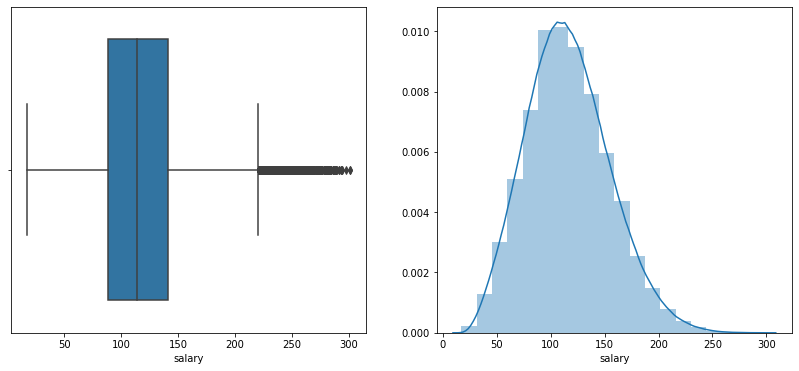

In [7]:
#distributino of salary
#impossibly slow to run plt.hist!
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(training.salary)
plt.subplot(1, 2, 2)
sns.distplot(training.salary, bins = 20)
plt.show()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64


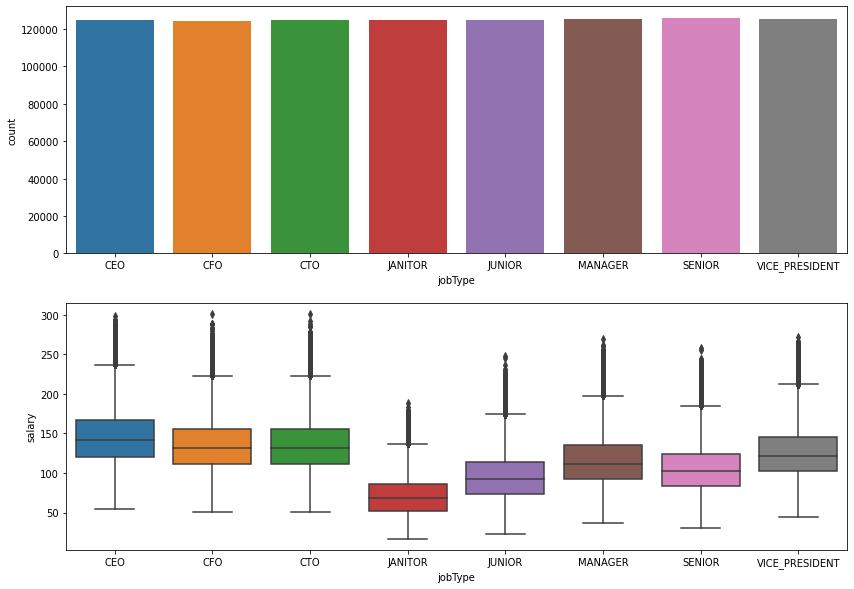

In [33]:
feature_plot(training, 'salary','jobType')

NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64


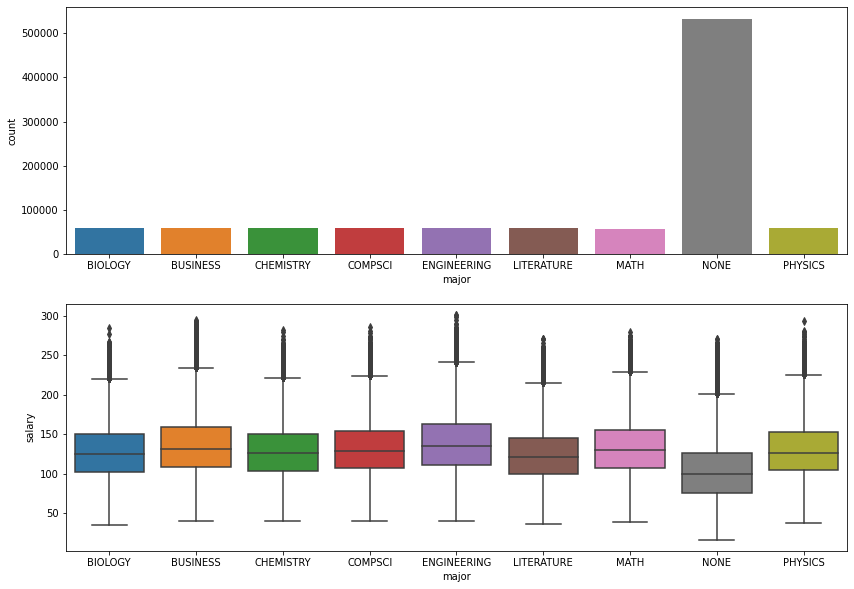

In [34]:
feature_plot(training, 'salary','major')

WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


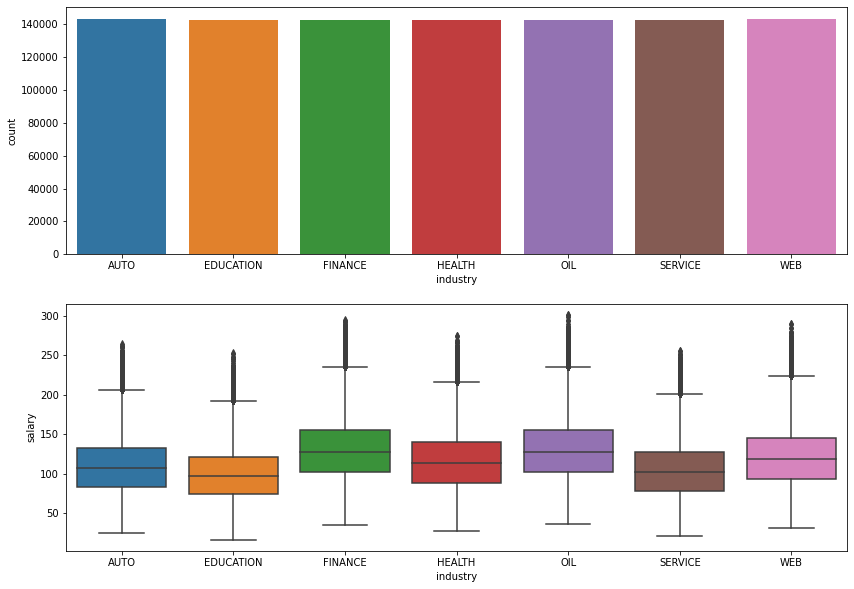

In [35]:
feature_plot(training, 'salary','industry')

HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64


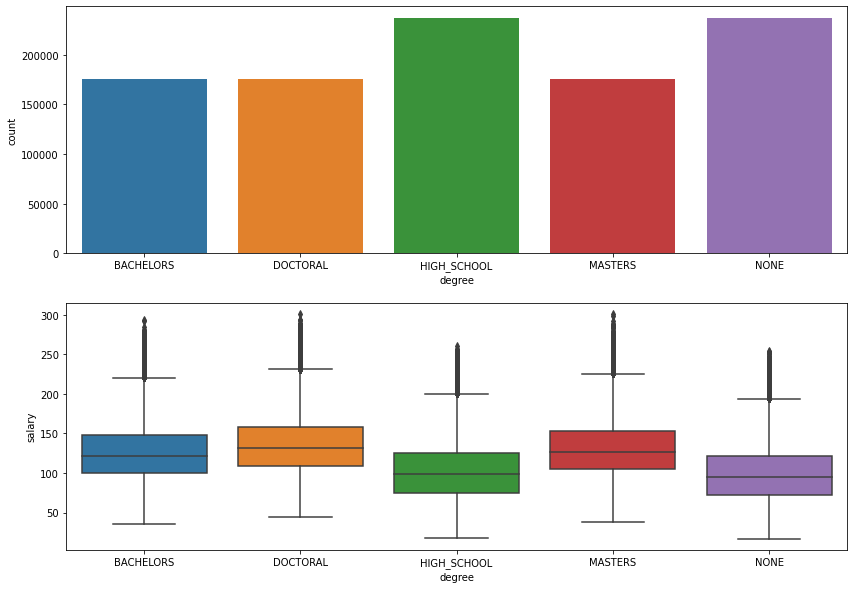

In [36]:
feature_plot(training, 'salary','degree')

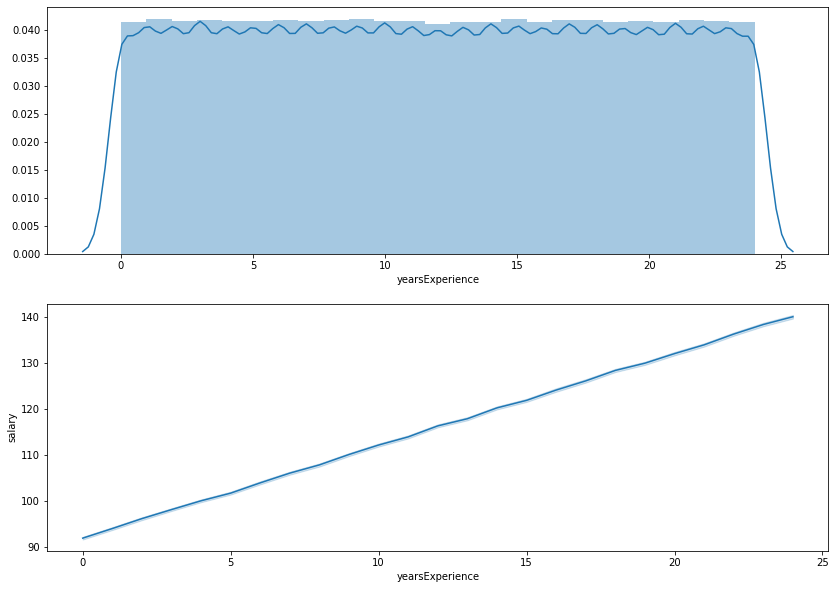

In [194]:
feature_plot(training, 'salary','yearsExperience')

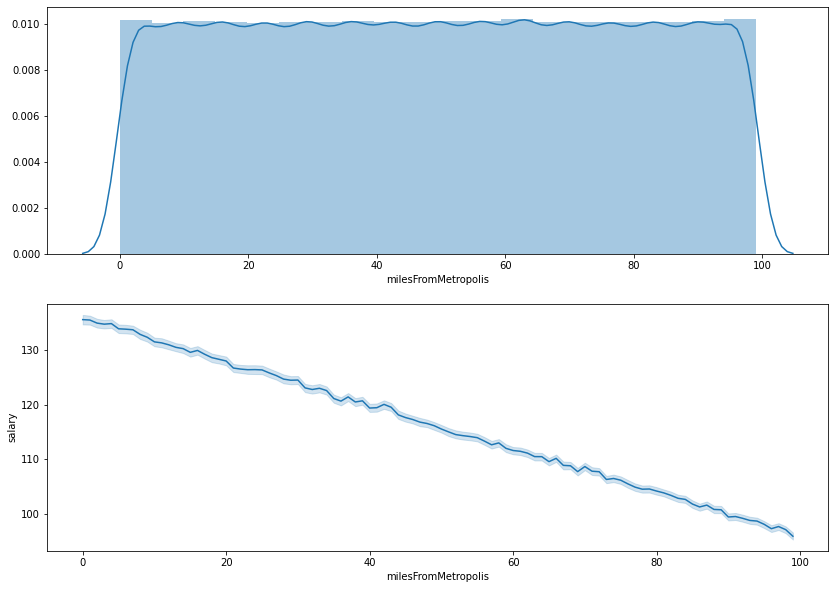

In [203]:
feature_plot(training,'salary','milesFromMetropolis')

In [12]:
#study the outliers
boundaries = study_outliers(training, 'salary')
print(boundaries)

The upper and lower bounds for variable salary are 220.5 and 8.5
[8.5, 220.5]


In [13]:
#check potential outliers below lower bounds
training[training.salary < boundaries[0]]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [15]:
#check potential outliers above lower bounds
upper_outliers = training[training.salary > boundaries[1]]
print(upper_outliers.shape)
upper_outliers.jobType.value_counts()
#observation: some jobType are CEO, CTO or VICE_PERSIDENT, so keep the data and do not treat them as outliers


(7117, 9)


CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [16]:
upper_outliers[upper_outliers['jobType'] == 'JUNIOR']
#for the jobType is JUNIOR, their degree is either masters or doctorals, keep the data and do not treat them as outliers

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


--- 5. Establish a baseline ---

In [17]:
from sklearn.preprocessing import LabelEncoder

In [48]:
training_copy = training[:]
for col in training_copy.columns:
    if training_copy[col].dtype.name == 'category':
        training_copy[col]=label_encode(training_copy, col, 'salary')
        training_copy[col] = training_copy[col].astype('int64')

training_copy.head()
training_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  int64 
 2   jobType              999995 non-null  int64 
 3   degree               999995 non-null  int64 
 4   major                999995 non-null  int64 
 5   industry             999995 non-null  int64 
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 76.3+ MB


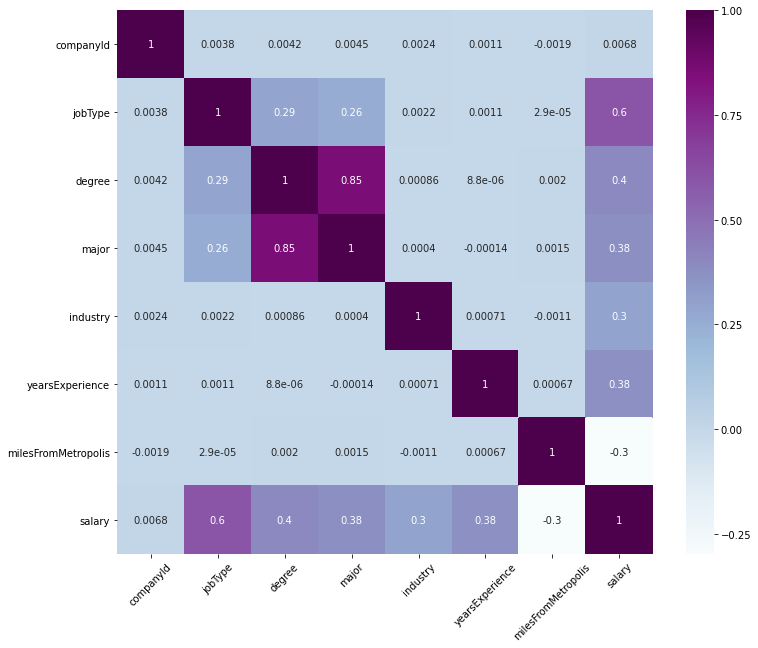

In [49]:
fig = plt.figure(figsize = (12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(training_copy[features + ['salary']].corr(), cmap = 'BuPu', annot=True)
plt.xticks(rotation = 45)
plt.show()

In [ ]:

#select a reasonable metric (RMSE)
#create an extremely simple model and measure its efficacy
#e.g. the averaged salary for each industry
#Measure RMSE
#5-fold cross-validation

--- 6. Hypothesize Solution ---

choose three models that may provide better results than the baseline, based on EDA, and explain why
potential new features such as interaction variables, summary statistic for each group.

In [ ]:
#


# Part 3 - DEVELOP
Cycle through creating features, tuning models, and training validating models (step 7-9) until reach the efficacy goal: 320 for senior data scientist

--- 7 Engineer features ---

In [ ]:
#make sure the data is ready for machine learning
#create any new features

--- 8 Create Models ---

In [ ]:
#create and turn the models

--- 9. test models ---

In [ ]:
#do 5-fold cross-validation on models and measure RMSE

--- 10. Select the best model ---

# Part 4 - DEPLOY
--- 11. automate pipeline ---

--- 12. deploy solution ---


In [ ]:
#save results to csv or database
#visualization for models and feature importance

---13. measure efficacy ---